In [9]:
!pip install ultralytics

In [ ]:
!pip install tqdm --upgrade

In [6]:
import os
import shutil
import random
import ultralytics
import torch
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.path import Path

from ultralytics import YOLO

from tqdm.notebook import tqdm

In [18]:
train_path_img = './yolo_data/images/train/'
train_path_label = './yolo_data/labels/train/'
val_path_img = './yolo_data/images/val/'
val_path_label = './yolo_data/labels/val/'
test_path = './yolo_data/test'

In [4]:
ultralytics.checks()

Ultralytics YOLOv8.1.28 🚀 Python-3.11.4 torch-2.2.1+cpu CPU (Intel Core(TM) i7-7700HQ 2.80GHz)
Setup complete ✅ (8 CPUs, 15.9 GB RAM, 885.7/931.0 GB disk)


In [ ]:
!yolo task=detect mode=train model=yolov8x.pt data=C:/Users/Owner/Desktop/GPFv4/data2.yaml epochs=20 imgsz=640 batch=3 project=C:/Users/Owner/Desktop/GPFv4/training_results name=Gold Particle iou=0.7 overlap_mask=false seed=42

In [1]:
!yolo task=detect mode=predict model=C:/Users/Owner/Desktop/GPFv4/training_results/Gold-Particle27/weights/best.pt conf=0.35 source=C:/Users/Owner/Desktop/GPFv4/test_images show_labels=False

Ultralytics YOLOv8.1.28 ðŸš€ Python-3.11.4 torch-2.2.1+cpu CPU (Intel Core(TM) i7-7700HQ 2.80GHz)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients, 257.4 GFLOPs

image 1/10 C:\Users\Owner\Desktop\GPFv4\test_images\S1.jpg: 640x640 12 12nms, 26 6nms, 1597.6ms
image 2/10 C:\Users\Owner\Desktop\GPFv4\test_images\S13.jpg: 640x640 26 12nms, 29 6nms, 1564.4ms
image 3/10 C:\Users\Owner\Desktop\GPFv4\test_images\S15.tif: 640x640 16 12nms, 59 6nms, 1522.5ms
image 4/10 C:\Users\Owner\Desktop\GPFv4\test_images\S22.tif: 640x640 47 12nms, 118 6nms, 1697.5ms
image 5/10 C:\Users\Owner\Desktop\GPFv4\test_images\S25.tif: 640x640 20 12nms, 36 6nms, 1612.3ms
image 6/10 C:\Users\Owner\Desktop\GPFv4\test_images\S27.tif: 640x640 22 12nms, 48 6nms, 1737.3ms
image 7/10 C:\Users\Owner\Desktop\GPFv4\test_images\S29.tif: 640x640 36 12nms, 54 6nms, 2138.7ms
image 8/10 C:\Users\Owner\Desktop\GPFv4\test_images\S4.jpg: 640x640 2 12nms, 119 6nms, 1772.6ms
image 9/10 C:\Users\Owner\Desktop\GPFv4\test


image 1/1 C:\Users\Owner\Desktop\GPFv4\test_images\S7.tif: 640x640 55 12nms, 58 6nms, 1737.5ms
Speed: 17.4ms preprocess, 1737.5ms inference, 17.0ms postprocess per image at shape (1, 3, 640, 640)


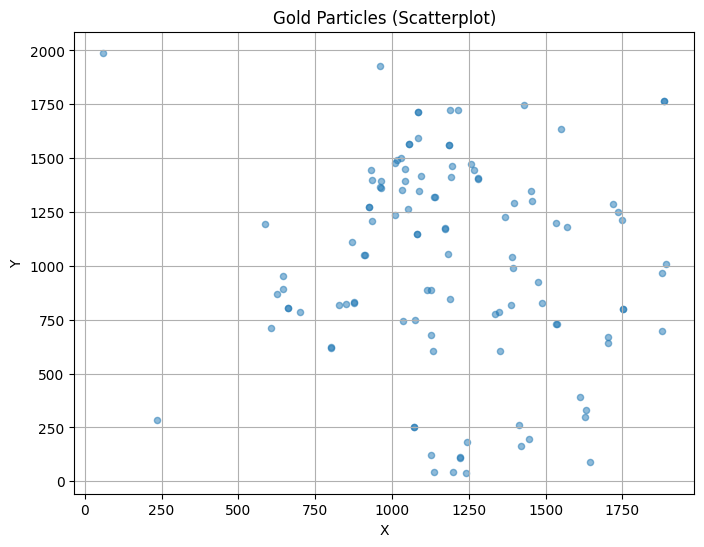

In [9]:
model = YOLO('C:/Users/Owner/Desktop/GPFv4/training_results/Gold-Particle27/weights/best.pt')


results = model.predict('C:/Users/Owner/Desktop/GPFv4/test_images/S7.tif')
#image size: 2115 x 2048

x_values = []
y_values = []

for x in results[0].boxes.xywh:
    x_values.append(x[0].item())
    y_values.append(2115 - x[1].item())



x_values = np.array(x_values)
y_values = np.array(y_values)


plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, alpha=0.5, s=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gold Particles (Scatterplot)')
plt.grid(True)
plt.show()
    


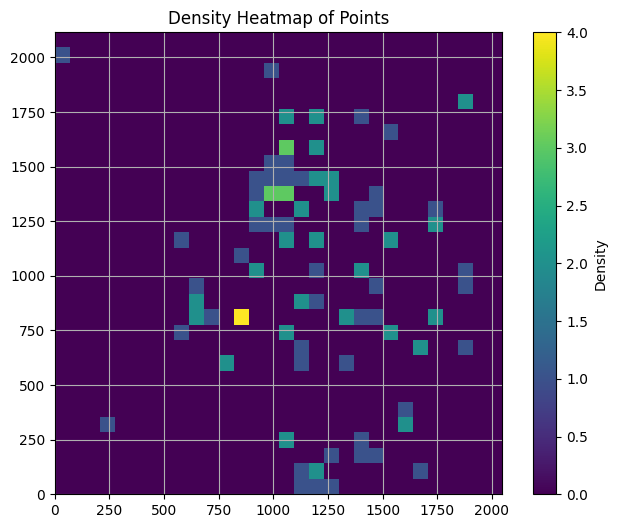

In [10]:
heatmap, xedges, yedges = np.histogram2d(x_values, y_values, bins=30, range=[[0, 2048], [0, 2115]])

plt.figure(figsize=(8, 6))
plt.imshow(heatmap.T, extent=[0, 2048, 0, 2115], origin='lower', cmap='viridis')
plt.colorbar(label='Density')
plt.title('Density Heatmap of Points')
plt.grid(True)
plt.show()

In [11]:
# Masking
points = []

for z in range(len(x_values)):
    x_value = x_values[z]
    y_value = y_values[z]

    point = [x_value, y_value]
    points.append(point)

11
[[1113.473388671875, 886.430908203125], [1074.27978515625, 748.75048828125], [1127.5419921875, 678.1231689453125], [1134.975830078125, 604.878662109375], [1187.291259765625, 846.65771484375], [1394.1048583984375, 990.6348876953125], [1391.8681640625, 1042.212890625], [1035.5938720703125, 742.0445556640625], [1476.57861328125, 926.661376953125], [1183.0634765625, 1055.707275390625], [1126.9482421875, 886.01318359375]]


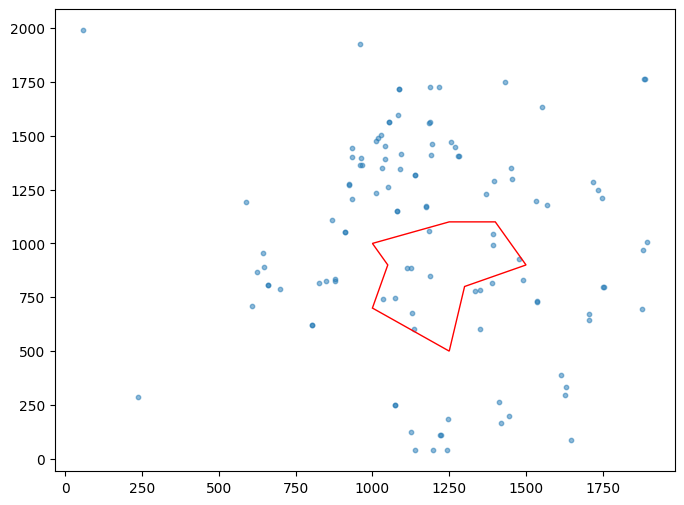

In [14]:
polygon_vertices = np.array([[1250,500],[1000,700],[1050,900],[1000,1000],[1250,1100],[1400,1100],[1500,900],[1300,800]])

path = Path(polygon_vertices)
mask = path.contains_points(points)

# print(len(mask))
# array of True and False values

points_in_ROI = []

for x in range(len(mask)):
    if mask[x] == True:
        points_in_ROI.append(points[x])  
    else:
        pass

        
          
print(len(points_in_ROI))

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, alpha=0.5, s=10)
polygon = Polygon(polygon_vertices, closed=True, edgecolor='r', facecolor='none')
plt.gca().add_patch(polygon)

print(points_in_ROI)